In [69]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller
from statsmodels.regression.linear_model import OLS
import itertools

In [70]:
tickers = ['AAPL','MSFT','NVDA', 'AMZN', 'GOOG', 'META', 'TSLA', 'AMD', 'CRM', 'BABA', 'INTC', 
           'PYPL', 'TTD']


cointegrated_pairs = []


data = yf.download(tickers, start="2021-01-01", end="2024-01-01")['Adj Close']
data.dropna()


data.head()

pairs = (itertools.combinations(tickers,2))





[*********************100%%**********************]  13 of 13 completed


In [71]:
numtickers = len(tickers)
alpha = 0.05


def two_step_coint_test(stock1,stock2):
    model = OLS(stock1,stock2).fit()
    residuals = model.resid

    adf = adfuller(residuals)

    return adf[1]



for i in range(numtickers):
    for j in range(i+1, numtickers):
        stock1 = data[tickers[i]]
        stock2 = data[tickers[j]]
        p_val = two_step_coint_test(stock1, stock2)

        if p_val < 0.05:
            cointegrated_pairs.append((tickers[i], tickers[j]))

cointegrated_pairs

[('MSFT', 'AMD'),
 ('MSFT', 'TTD'),
 ('AMZN', 'TTD'),
 ('GOOG', 'TSLA'),
 ('GOOG', 'TTD'),
 ('TSLA', 'TTD'),
 ('CRM', 'TTD')]

In [76]:
spreads = pd.DataFrame()


for pair in cointegrated_pairs:
    tk1, tk2 = pair
    spreads[f"{tk1} - {tk2}"] = data[tk1] - data[tk2]
    



spreads.head()




,MSFT - AMD,MSFT - TTD,AMZN - TTD,GOOG - TSLA,GOOG - TTD,TSLA - TTD,CRM - TTD
Date,,,,,,,
2021-01-04,118.544281,133.501282,81.988495,-157.056358,8.857307,165.913666,142.337616
2021-01-05,118.277687,132.193687,82.071510,-158.203911,7.978760,166.182671,142.033180
2021-01-06,115.245331,131.514336,82.858009,-165.441391,12.490944,177.932335,141.471519
2021-01-07,116.265411,135.122414,81.805000,-182.869759,12.840576,195.710335,141.054298
2021-01-08,118.133606,133.132607,79.553993,-203.200867,10.558128,213.758995,141.824684


AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

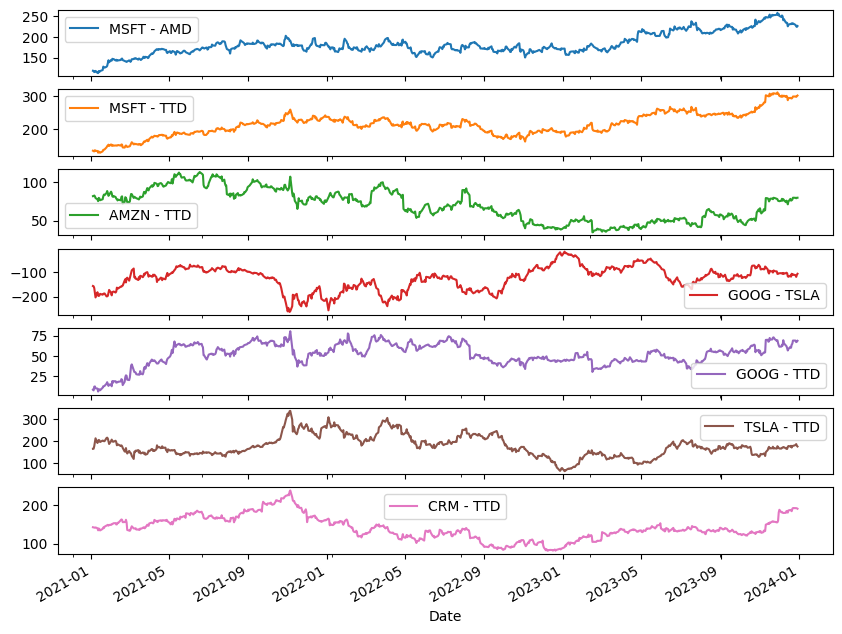

In [79]:
axes = spreads.plot(subplots=True, layout=(len(spreads.columns), 1), figsize=(10, 8), sharex=True)

# Assign titles for each subplot
for i, col in enumerate(spreads.columns):
    axes[i].set_title(col)

plt.tight_layout()  # Adjust layout so titles don't overlap
plt.show()